# Healthcare

### Project 2

### Problem Statement

##### > NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
##### > The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
##### > Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description

##### The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.



###                          Variables ,                                                        	Description
##### Pregnancies	-                                                                      Number of times pregnant
##### Glucose - 	Plasma glucose concentration in an oral glucose tolerance test
##### BloodPressure  - 	Diastolic blood pressure (mm Hg)
##### SkinThickness  - Triceps skinfold thickness (mm)
##### Insulin	- Two hour serum insulin
##### BMI	- Body Mass Index
##### DiabetesPedigreeFunction	-  Diabetes pedigree function
##### Age	-  Age in years
##### Outcome	-  Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

###  Project Task: Week 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from IPython import display


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings("ignore")

In [198]:
data = pd.read_csv('D:/Downloads_D/Capstone Projects_Simplilearn/Project 2/Healthcare - Diabetes/health care diabetes.csv')

In [199]:
# printing the top 5 data points

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [200]:
# Printing the shape of the data

data.shape

(768, 9)

##### Our 'health care diabetes' data has 768 - data points, and 9 - feature values

#### Performing Descriptive Analysis

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [202]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [203]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [204]:
data.columns[1:6]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [205]:
for i in data.columns[1:6]:
    if data[i].mean() > data[i].median():
        print(i, ' - Right Skewed')
    else:
        print(i, ' - Left Skewed')

Glucose  - Right Skewed
BloodPressure  - Left Skewed
SkinThickness  - Left Skewed
Insulin  - Right Skewed
BMI  - Left Skewed


<AxesSubplot:>

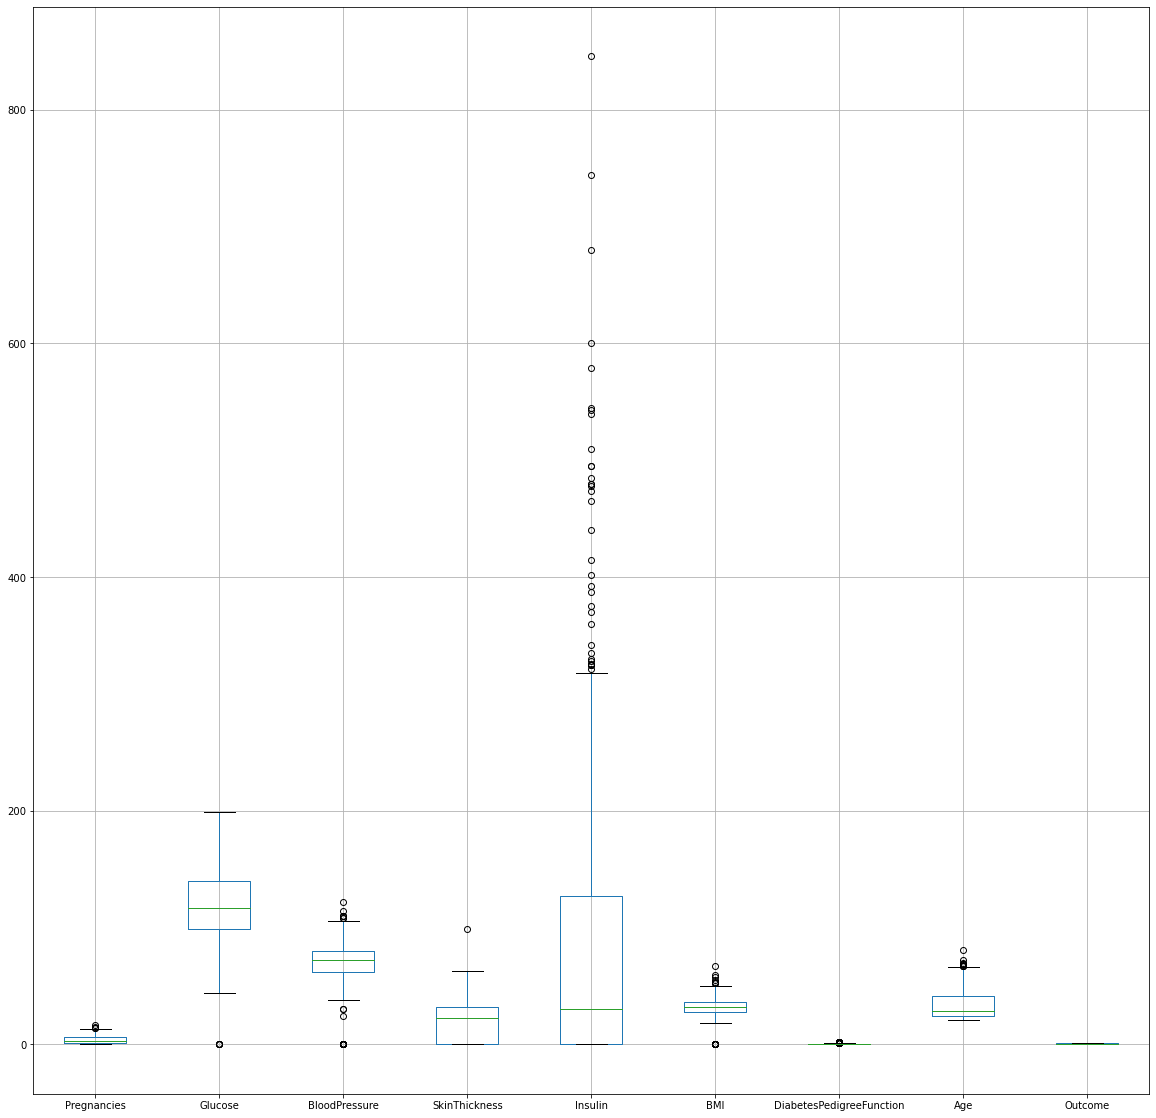

In [206]:
# Checking for any outliers using boxplot

plt.figure(figsize = (20,20))
data.boxplot()

##### 'Insulin' has the most high number of outliers, the reason is the variance of range of values due to '0' values in the data. 

In [207]:
# Checking for null values(0) in the data 

data[data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]== 0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [208]:
# Checking for null values(0) with % values in data..

for i in data.columns[1:6]:
    print(i)
    print(data[i].value_counts(normalize = True)[0], '\n\n')

Glucose
0.006510416666666667 


BloodPressure
0.045572916666666664 


SkinThickness
0.2955729166666667 


Insulin
0.4869791666666667 


BMI
0.014322916666666666 




##### ' BloodPressure ',  and  ' Insulin ' has almost 45% of '0' values which is null values   in the data, we can't drop these values as they infer some information. We can treat these null values by Imputation methods.

In [209]:
data[data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]!=0]#.median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,NaN,33.6,NaN,NaN,NaN
1,NaN,85.0,66.0,29.0,NaN,26.6,NaN,NaN,NaN
2,NaN,183.0,64.0,NaN,NaN,23.3,NaN,NaN,NaN
3,NaN,89.0,66.0,23.0,94.0,28.1,NaN,NaN,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,48.0,180.0,32.9,NaN,NaN,NaN
764,NaN,122.0,70.0,27.0,NaN,36.8,NaN,NaN,NaN
765,NaN,121.0,72.0,23.0,112.0,26.2,NaN,NaN,NaN
766,NaN,126.0,60.0,NaN,NaN,30.1,NaN,NaN,NaN


In [210]:
# Checking for the imputing the null values by meidan without null values

data[data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]!=0].median()

Pregnancies                   NaN
Glucose                     117.0
BloodPressure                72.0
SkinThickness                29.0
Insulin                     125.0
BMI                          32.3
DiabetesPedigreeFunction      NaN
Age                           NaN
Outcome                       NaN
dtype: float64

In [211]:
# Imputing the null values with Median values

for i in data.columns[1:6]:
    print(i)
    median_values = data[data[i]!=0][i].median()
    print(median_values)
    data[i].replace(0, median_values, inplace= True)

Glucose
117.0
BloodPressure
72.0
SkinThickness
29.0
Insulin
125.0
BMI
32.3


In [212]:
# Checking for null values(0) in the data 

data[data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]== 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [213]:
counts= data.dtypes.value_counts()

In [214]:
counts

int64      7
float64    2
dtype: int64

### Project Task: Week 2

#### Data Exploration:

In [215]:
data['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='Density'>

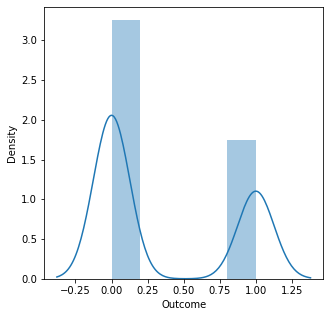

In [216]:
plt.figure(figsize = (5,5))
sns.distplot(data['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

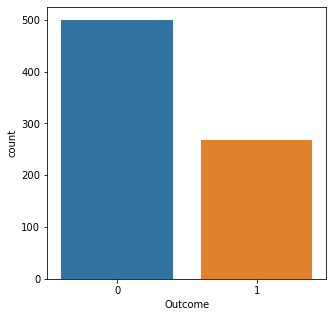

In [217]:
plt.figure(figsize = (5,5))
sns.countplot(data['Outcome'])

##### from the above plot and distrbution I can infer that :
##### class '0' (Non - diabetic) has 65% of the data distribution
##### class '1' (diabetic) has 34 % of the overall data distribution.

##### Our dataset distribution of classes are 65 % and 35 % that is some extent that we do not have to perform oversampling and undersampling methods for our model to perform.

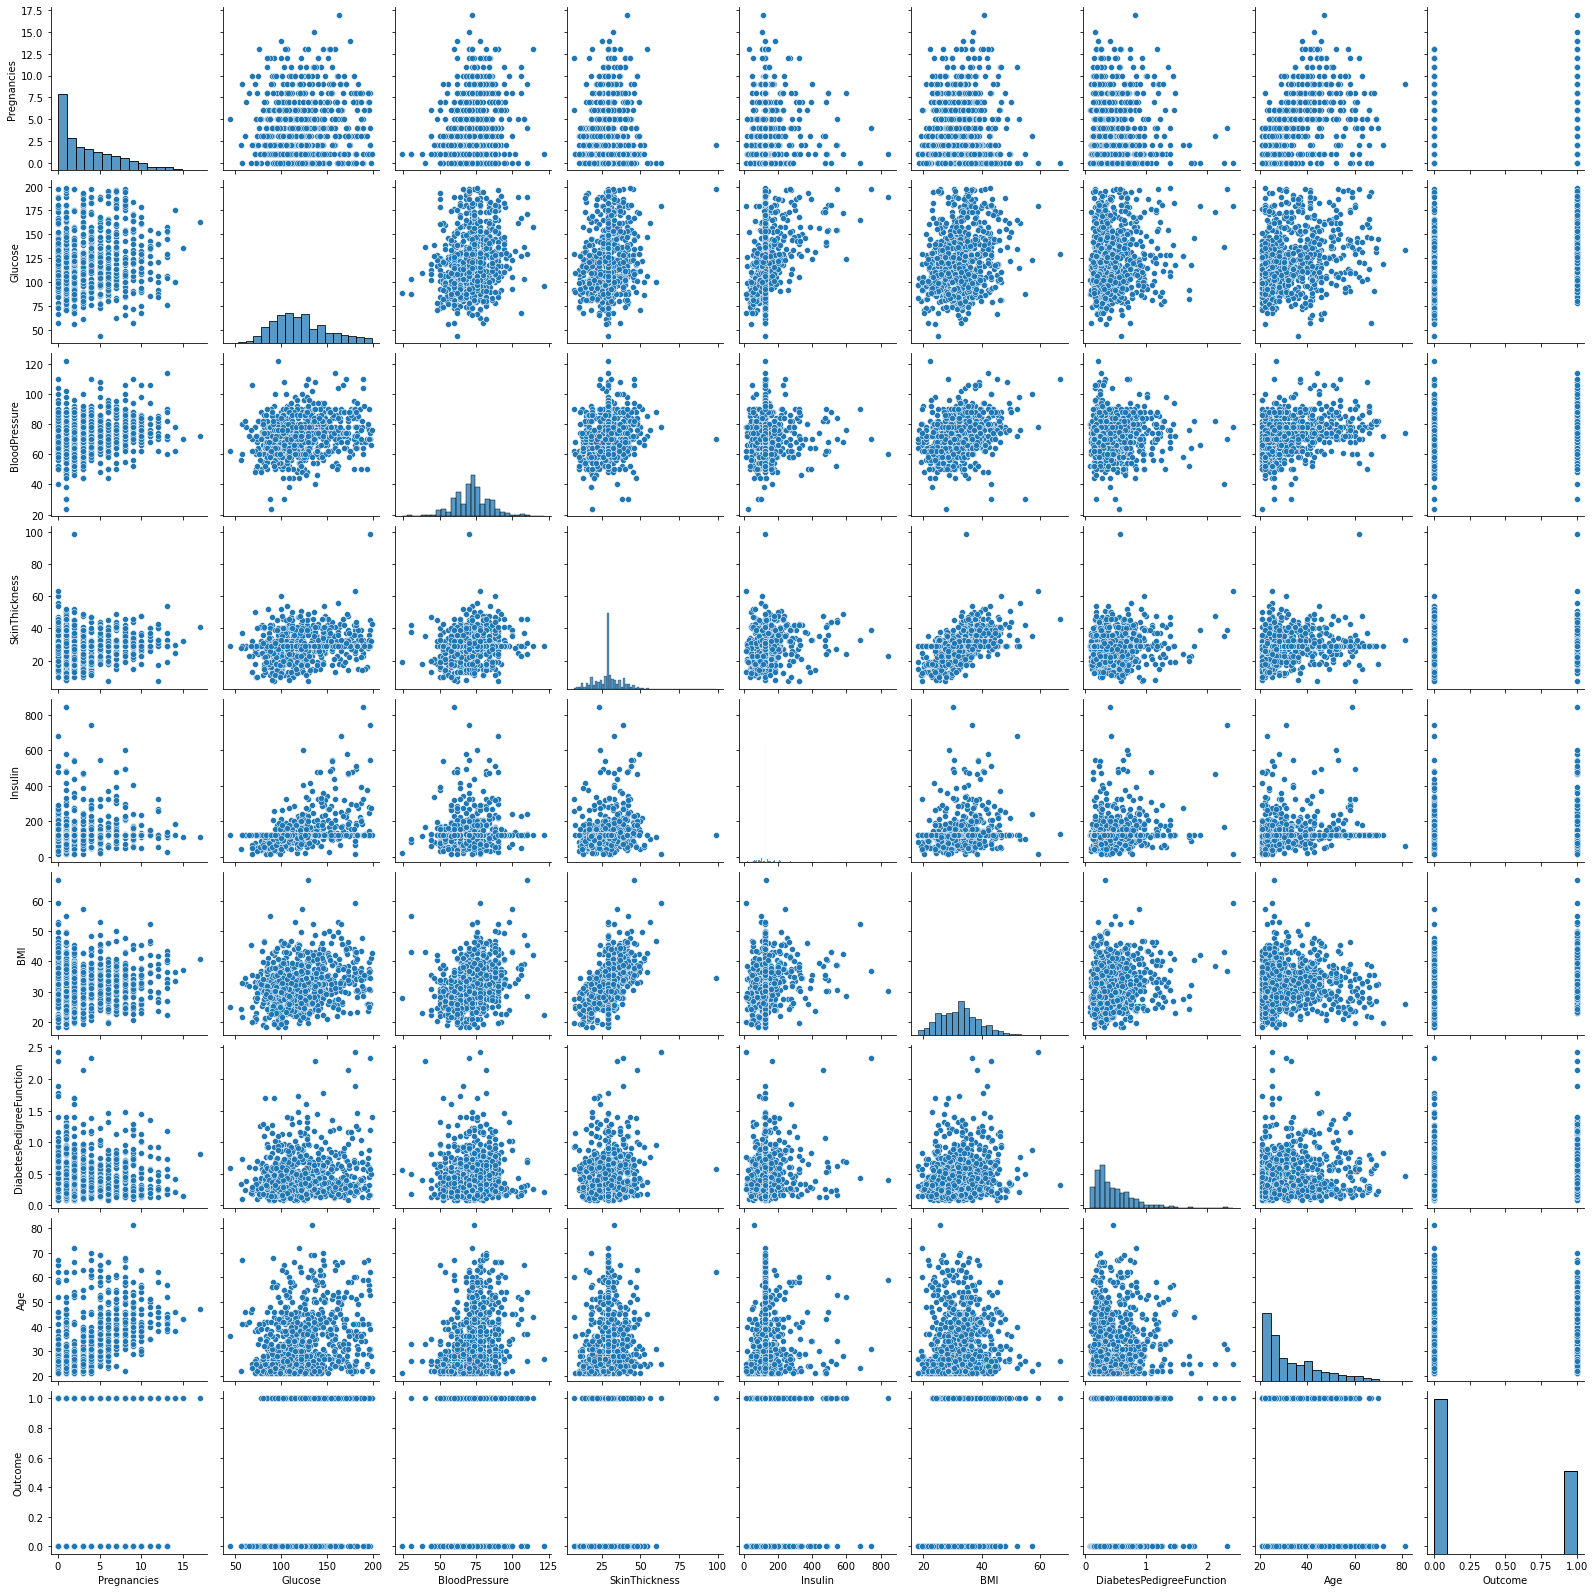

In [218]:
sns.pairplot(data, palette ='coolwarm')

In [219]:
correl = data.corr()

<AxesSubplot:>

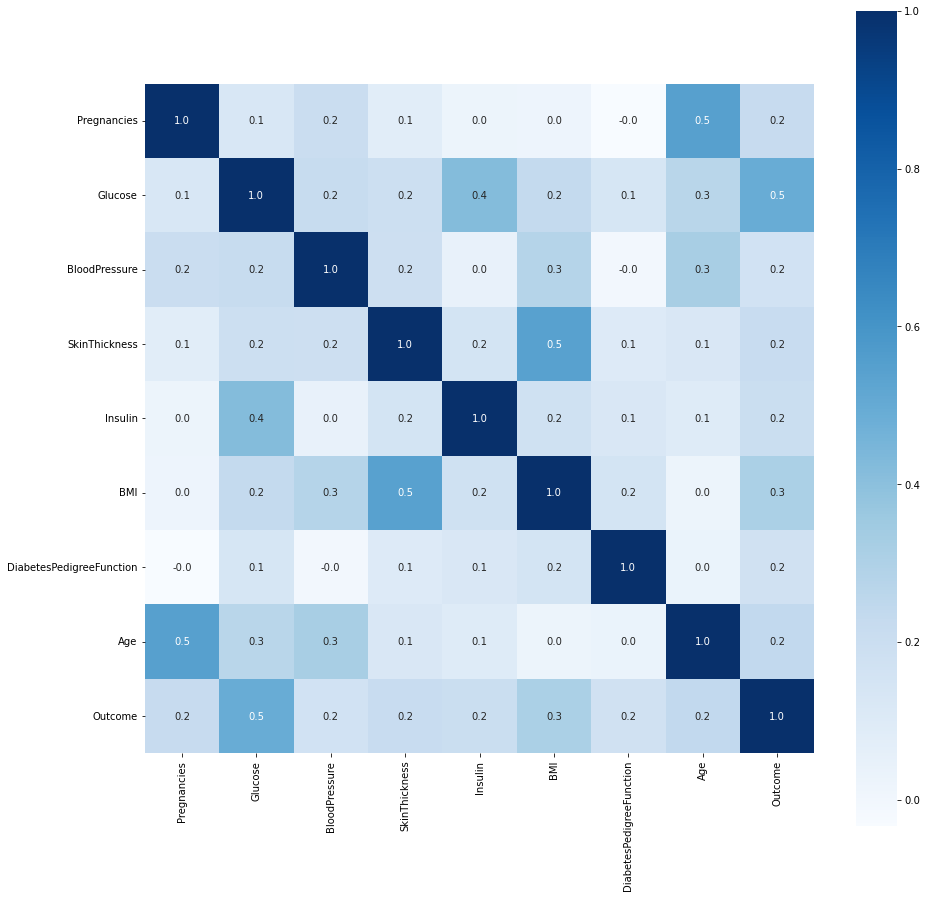

In [220]:
plt.figure(figsize= (15, 15))
sns.heatmap(correl, cbar = True, square= True, fmt = '.1f', annot= True, annot_kws= {'size' : 10 }, cmap = 'Blues' )

### Positive Correlated fields :
##### Glucose
##### BMI
##### Age
##### Insulin

### Negative Correlated fields:
##### DiabetesPedigreeFunction

In [221]:
plt.figure(figsize=(20,20))

r = [ 
    round(sp.stats.pearsonr(data['Outcome'], data['Insulin'])[0], 2),
    round(sp.stats.pearsonr(data['Outcome'], data['BloodPressure'])[0], 2),
    round(sp.stats.pearsonr(data['Outcome'], data['Age'])[0], 2),
    
]

<Figure size 1440x1440 with 0 Axes>

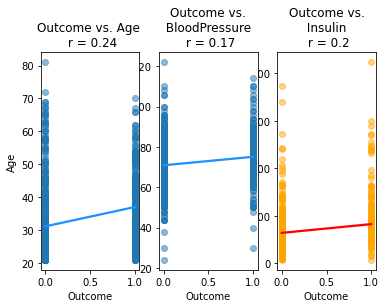

In [222]:
plt.subplot(1, 3, 3)

sns.regplot(data= data, x='Outcome', y='Insulin',
ci=False, line_kws={'color': 'red'}, scatter_kws={'color': 'orange', 'alpha': 0.5})
plt.title(f'Outcome vs.\n Insulin \n r = {r[0]}')

plt.subplot(1, 3, 2)
sns.regplot(data= data, x='Outcome', y='BloodPressure', ci=False,
           line_kws={'color': 'dodgerblue'}, scatter_kws={'alpha': 0.5})
plt.title(f'Outcome vs.\n BloodPressure \n r = {r[1]}')

plt.subplot(1, 3, 1)
sns.regplot(data= data, x='Outcome', y='Age', ci=False,
           line_kws={'color': 'dodgerblue'}, scatter_kws={'alpha': 0.5})
plt.title(f'Outcome vs. Age \n r = {r[2]}')

plt.show()

### Project Task: Week 3

#### Data Modeling:

In [223]:
X = data.drop(columns = ['Outcome'], axis = 1)

In [224]:
Y = data['Outcome']

In [225]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35      125  33.6   
1              1       85             66             29      125  26.6   
2              8      183             64             29      125  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27      125  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             29      125  30.1   
767            1       93             70             31      125  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


####  '0' - Non - Diabetic
#### '1' - Diabetic

In [226]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Splitting the dataset into trainig and testing dataset using train_test_Split having:
#### training set : 0.70
#### testing set: 0.30

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = Y)

In [228]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


### Project Task: Week 4

#### Model Creation

1. Logistic Regression
2. Random Forest Classifier
3. XG Boost Classifier
4. KNN

In [229]:
accuracy_Train = []
accuracy_Test = []
sensitivity_1 = []
specificity_1 = []
AUC_score = []


def diabetic_predic_models(model, model_name):

    fig = plt.figure(figsize= (6,6))
    #axs = plt.axis()
    
    global Y_train
    global Y_test
    
    # Training the model
    model.fit(X_train, Y_train)
    
    
    
    # accuracy of training dataset
    y_pred_train = model.predict(X_train)
    accuracy_Score_train_model = accuracy_score(Y_train, y_pred_train)
    accuracy_Train.append(accuracy_Score_train_model)
    
    
    
    
    # accuracy of testing dataset
    y_pred_test = model.predict(X_test)
    accuracy_Score_test_model = accuracy_score(Y_test, y_pred_test)
    classification_report_test_model = classification_report(Y_test, y_pred_test)
    confusion_matrix_test_model = confusion_matrix(Y_test, y_pred_test)
    accuracy_Test.append(accuracy_Score_test_model)
    
    
    
    
    
    
    #printing Results
    print('Accuracy_Training :', round(accuracy_Score_train_model,5))
    print('Accuracy_Testing :', round(accuracy_Score_test_model,5))
    print('Clasification Report Test :', classification_report_test_model)
    print('Confusion Matrix Test :', confusion_matrix_test_model)
    print('\n\n')


    
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    confusion_matrix_test_model.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix_test_model.flatten()/np.sum(confusion_matrix_test_model)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(confusion_matrix_test_model, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    
   
    
    tn, fp, fn, tp = confusion_matrix_test_model.ravel()
    
    print('tn : ',tn)
    print('fp : ',fp)
    print('fn : ',fn)
    print('tp : ',tp)
    print('\n')
    
    sensitivity = tp/(tp+fn)
    sensitivity_1.append(sensitivity)
    
    specificity = tn/(tn+fp)
    specificity_1.append(specificity)
    
    print('Sensitivity : ', sensitivity, '\n\n')
    
    
    print('Specificity ', specificity, '\n\n')
    
    
    
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    
    
    probs = model.predict_proba(X_test)
    
    # Keep Probabilities of the positive class only.
    
    
    
    
    probs = probs[:, 1]
    
    # Compute the AUC Score
    auc = roc_auc_score(Y_test, probs)
    print('AUC: %.2f' % auc)
    AUC_score.append(round(auc, 2))
    
    
    # Get the ROC Curve.
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    
    
    # Plot ROC Curve using our defined function
    plot_roc_curve(fpr, tpr)

    
    

#### 1. Logistic Regression

Accuracy_Training : 0.7933
Accuracy_Testing : 0.74026
Clasification Report Test :               precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231

Confusion Matrix Test : [[130  20]
 [ 40  41]]





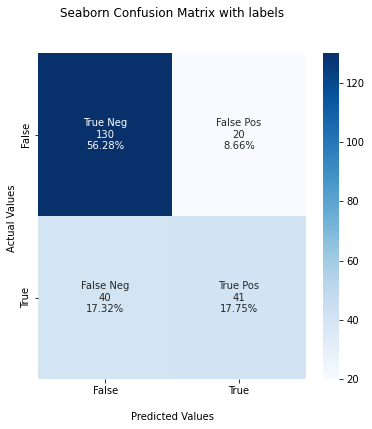

tn :  130
fp :  20
fn :  40
tp :  41


Sensitivity :  0.5061728395061729 


Specificity  0.8666666666666667 


AUC: 0.84


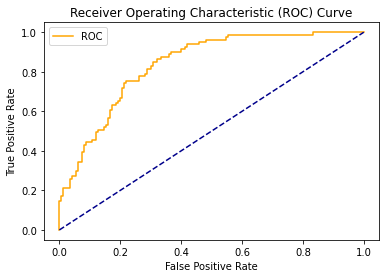

In [230]:
lr = LogisticRegression()

diabetic_predic_models(lr, "Logistic_regressor.pkl")

#### 2. Random Forest Classifier

Accuracy_Training : 1.0
Accuracy_Testing : 0.75758
Clasification Report Test :               precision    recall  f1-score   support

           0       0.79      0.86      0.82       150
           1       0.69      0.57      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

Confusion Matrix Test : [[129  21]
 [ 35  46]]





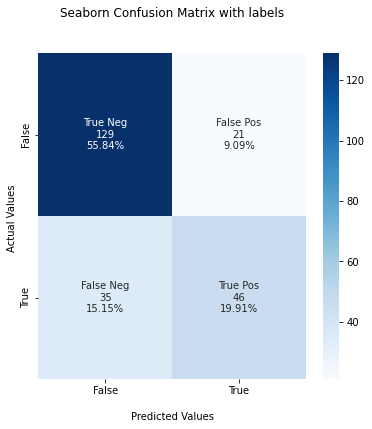

tn :  129
fp :  21
fn :  35
tp :  46


Sensitivity :  0.5679012345679012 


Specificity  0.86 


AUC: 0.82


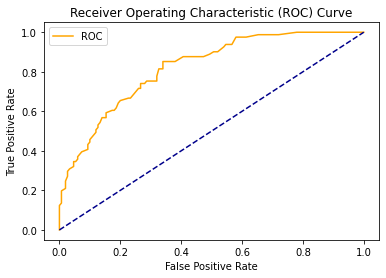

In [231]:
rf = RandomForestClassifier()


diabetic_predic_models(rf, "Randomforest.pkl")

#### 2.1 Random Forest, Randomized Search CV ---> Direct showing with Randomized Search CV

In [232]:
rf = RandomForestClassifier()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_gs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Accuracy_Training : 0.86406
Accuracy_Testing : 0.74459
Clasification Report Test :               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix Test : [[130  20]
 [ 39  42]]





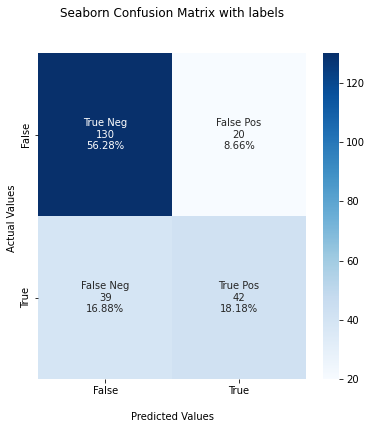

tn :  130
fp :  20
fn :  39
tp :  42


Sensitivity :  0.5185185185185185 


Specificity  0.8666666666666667 


AUC: 0.83


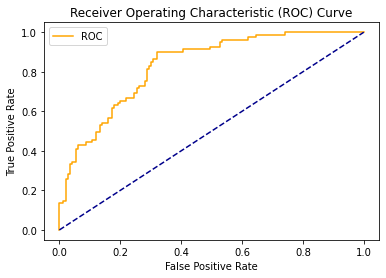

In [233]:
diabetic_predic_models(rf_gs,'random_forest_randomized_search.pkl')


In [234]:
print(rf_gs.best_estimator_)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=600)


#### 3. XGBClassifier

Accuracy_Training : 1.0
Accuracy_Testing : 0.74892
Clasification Report Test :               precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.66      0.59      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231

Confusion Matrix Test : [[125  25]
 [ 33  48]]





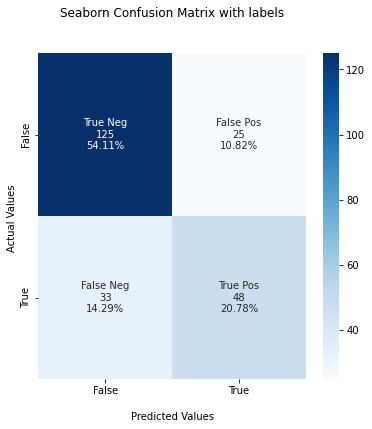

tn :  125
fp :  25
fn :  33
tp :  48


Sensitivity :  0.5925925925925926 


Specificity  0.8333333333333334 


AUC: 0.80


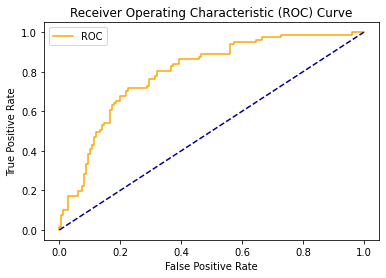

In [235]:
xgb = XGBClassifier()

diabetic_predic_models(xgb, "XGBClassifier.pkl")

#### 4. KNN Classfiier

Accuracy_Training : 0.85475
Accuracy_Testing : 0.70563
Clasification Report Test :               precision    recall  f1-score   support

           0       0.76      0.80      0.78       150
           1       0.59      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

Confusion Matrix Test : [[120  30]
 [ 38  43]]





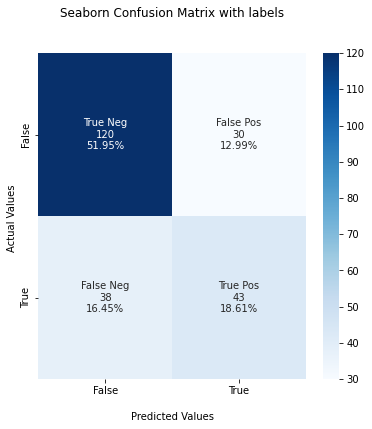

tn :  120
fp :  30
fn :  38
tp :  43


Sensitivity :  0.5308641975308642 


Specificity  0.8 


AUC: 0.69


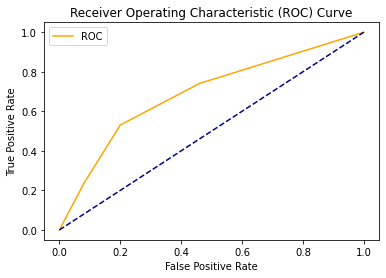

In [236]:
knn = KNeighborsClassifier(n_neighbors=3)

diabetic_predic_models(knn, "Kneighbors.pkl")

#### Choosing a K Value

#### 4.1  KNN _ With choosing K value

In [237]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

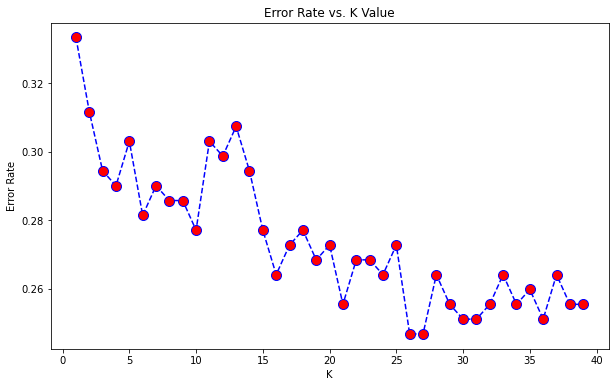

In [238]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy_Training : 0.76723
Accuracy_Testing : 0.74459
Clasification Report Test :               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix Test : [[130  20]
 [ 39  42]]





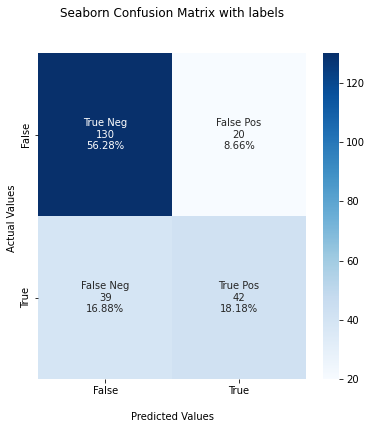

tn :  130
fp :  20
fn :  39
tp :  42


Sensitivity :  0.5185185185185185 


Specificity  0.8666666666666667 


AUC: 0.79


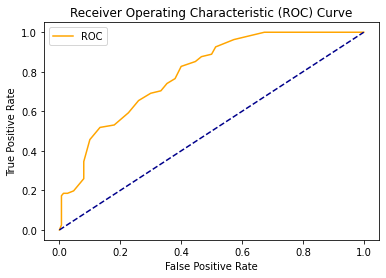

In [239]:
knn = KNeighborsClassifier(n_neighbors = 34)

diabetic_predic_models(knn, "Kneighbors.pkl")

#### Min - Max Scaling for KNN Classifier

In [240]:
scale = MinMaxScaler()

scaled_train_x = scale.fit_transform(X_train)

scaled_test_x = scale.transform(X_test)

In [241]:
print(scaled_train_x)

[[0.41176471 0.90070922 0.6122449  ... 0.35378323 0.12071269 0.33333333]
 [0.35294118 0.19858156 0.55102041 ... 0.26584867 0.13273942 0.35      ]
 [0.11764706 0.34751773 0.40816327 ... 0.25153374 0.58619154 0.21666667]
 ...
 [0.05882353 0.28368794 0.46938776 ... 0.40695297 0.0596882  0.15      ]
 [0.35294118 0.94326241 0.69387755 ... 0.35378323 0.08641425 0.75      ]
 [0.23529412 0.61702128 0.34693878 ... 0.23108384 0.09042316 0.26666667]]


In [242]:
print(scaled_test_x)

[[0.17647059 0.5177305  0.55102041 ... 0.20858896 0.1064588  0.21666667]
 [0.23529412 0.36879433 0.40816327 ... 0.3394683  0.36570156 0.08333333]
 [0.64705882 0.60992908 0.71428571 ... 0.37627812 0.07572383 0.5       ]
 ...
 [0.76470588 0.34751773 0.48979592 ... 0.37627812 0.04187082 0.4       ]
 [0.11764706 0.71631206 0.67346939 ... 0.27402863 0.32115813 0.75      ]
 [0.05882353 0.41134752 0.46938776 ... 0.33537832 0.19821826 0.18333333]]


accuracy on training :  0.8547486033519553
accuracy on testing :  0.7056277056277056
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       150
           1       0.59      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

[[120  30]
 [ 38  43]]


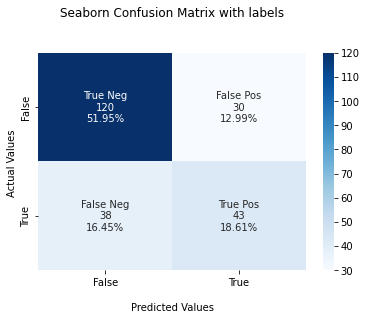

tn :  120
fp :  30
fn :  38
tp :  43


Sensitivity :  0.5308641975308642 


Specificity  0.8 


AUC: 0.69


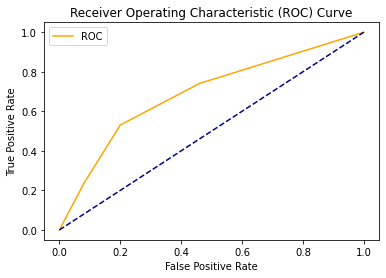

In [243]:
knn_min_max = KNeighborsClassifier(n_neighbors= 3)

knn_min_max.fit(X_train, Y_train)

x_train_pred = knn_min_max.predict(X_train)
accuracy_Score_train_model = accuracy_score(Y_train, x_train_pred)



x_test_pred = knn_min_max.predict(X_test)
accuracy_Score_test_model = accuracy_score(Y_test, x_test_pred)


classification_report_test_model = classification_report(Y_test, x_test_pred)
confusion_matrix_test_model = confusion_matrix(Y_test, x_test_pred)

print('accuracy on training : ',accuracy_Score_train_model)
print('accuracy on testing : ',accuracy_Score_test_model)
print(classification_report_test_model)
print(confusion_matrix_test_model)






group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                    confusion_matrix_test_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix_test_model.flatten()/np.sum(confusion_matrix_test_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix_test_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
    
    
   
    
tn, fp, fn, tp = confusion_matrix_test_model.ravel()
    
print('tn : ',tn)
print('fp : ',fp)
print('fn : ',fn)
print('tp : ',tp)
print('\n')
    
sensitivity = tp/(tp+fn)
    
specificity = tn/(tn+fp)
    
print('Sensitivity : ', sensitivity, '\n\n')
    
    
print('Specificity ', specificity, '\n\n')
    
    
    
    
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
probs = knn_min_max.predict_proba(X_test)
    
# Keep Probabilities of the positive class only.
probs = probs[:, 1]
    
# Compute the AUC Score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.2f' % auc)
    
    
# Get the ROC Curve.
fpr, tpr, thresholds = roc_curve(Y_test, probs)
    
    
# Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

    
    

In [244]:
print(len(Technique))
print(len(accuracy_Train))
print(len(accuracy_Test))
print(len(sensitivity_1))
print(len(specificity_1))
print(len(AUC_score))

6
6
6
6
6
6


In [245]:
Technique = ["LogisticRegression","RandomForest Classifier","RandomForest Classifier Randomized Search CV","XGB Classifier","KNN Classifier", "KNN Classifier_ with K value"]
results=pd.DataFrame({'Model': Technique,'Accuracy Score(Train)': accuracy_Train,'Accuracy Score(Test)': accuracy_Test,'Sensitivity': sensitivity_1, 'Specificity': specificity_1, 'AUC Score' : AUC_score})
#display(results)

In [246]:
knn_Min_Max_row = {'Model':'Min - Max Scaling for KNN Classifier', 'Accuracy Score(Train)': accuracy_Score_train_model,'Accuracy Score(Test)': accuracy_Score_test_model,'Sensitivity':sensitivity,'Specificity': specificity, 'AUC Score' : auc}


results = results.append(knn_Min_Max_row,ignore_index=True)

print('Modified Sample pandas DataFrame:\n')
display(results)

Modified Sample pandas DataFrame:



,Model,Accuracy Score(Train),Accuracy Score(Test),Sensitivity,Specificity,AUC Score
0,LogisticRegression,0.793296,0.740260,0.506173,0.866667,0.840000
1,RandomForest Classifier,1.000000,0.757576,0.567901,0.860000,0.820000
2,RandomForest Classifier Randomized Search CV,0.864060,0.744589,0.518519,0.866667,0.830000
3,XGB Classifier,1.000000,0.748918,0.592593,0.833333,0.800000
4,KNN Classifier,0.854749,0.705628,0.530864,0.800000,0.690000
5,KNN Classifier_ with K value,0.767225,0.744589,0.518519,0.866667,0.790000
6,Min - Max Scaling for KNN Classifier,0.854749,0.705628,0.530864,0.800000,0.690617


### Dashboard

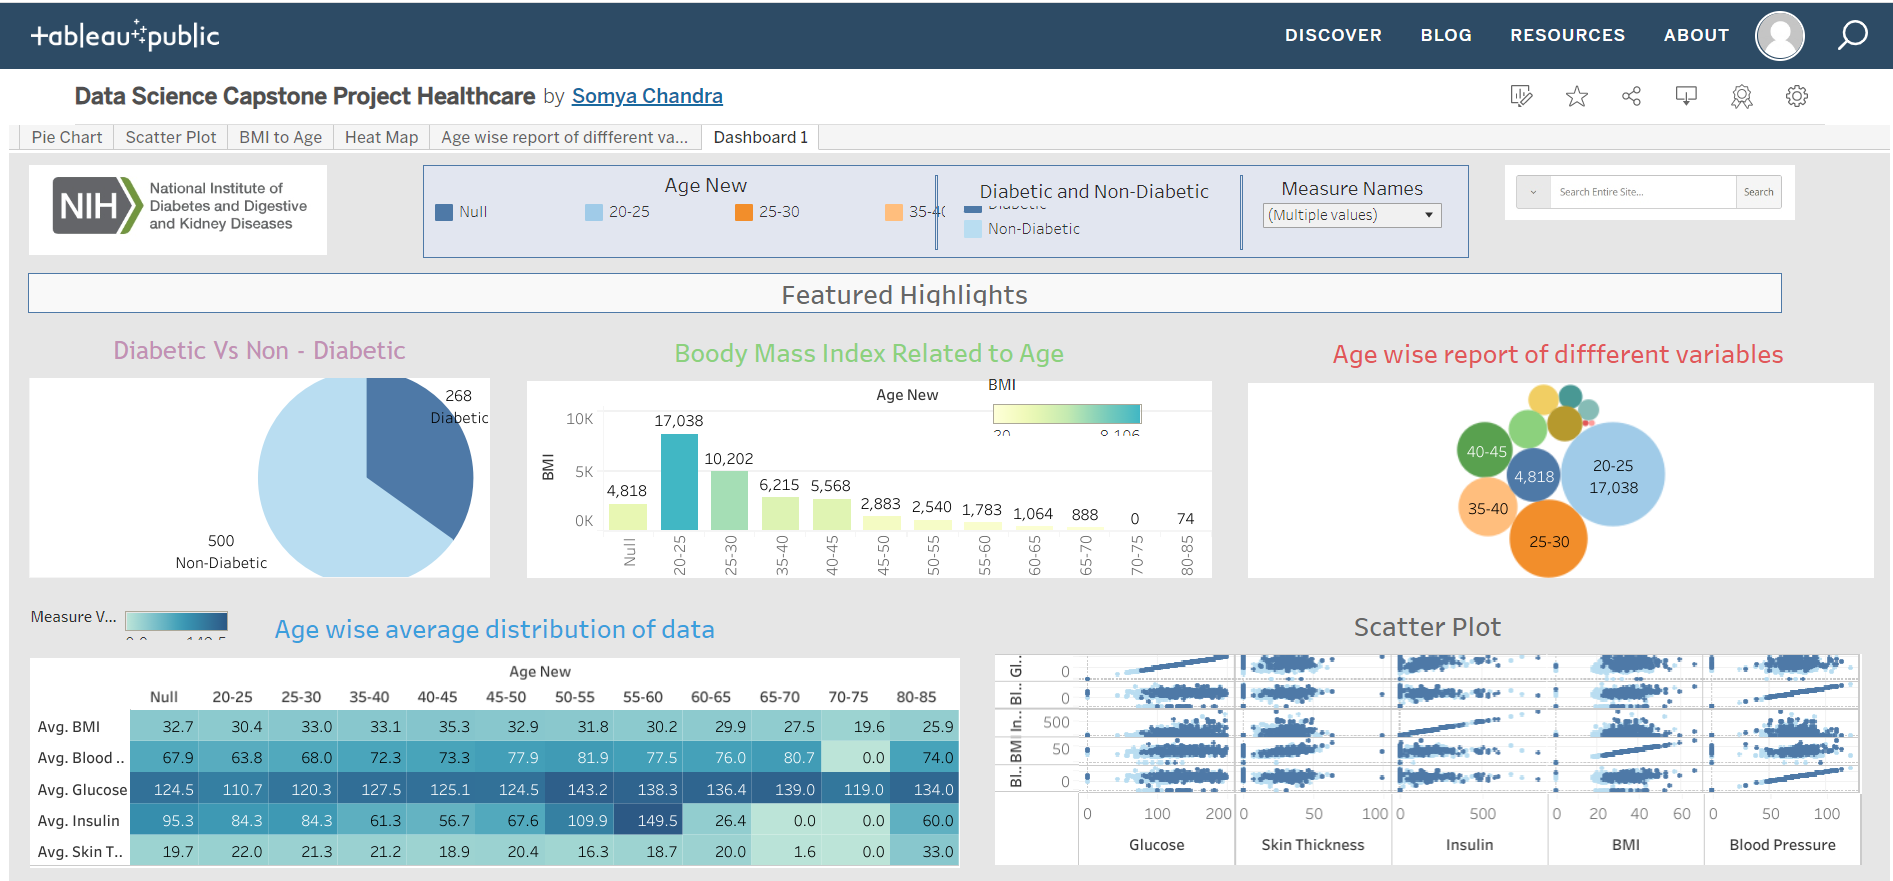

In [5]:
display.Image('D:/Downloads_D/tableau.png')